In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
import IPython.display

In [44]:
wav = 'non_people2.wav'
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
IPython.display.Audio(data=y[:-16000], rate=sr)

sr:  44100
wav shape:  (47604,)
length:  1.0794557823129252 secs


In [45]:
sf.write("non_people2.wav", y[8000:], sr, subtype='PCM_24')

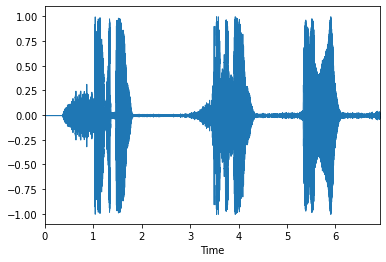

In [37]:
librosa.display.waveplot(y, sr=sr)

sf.write("ect6.wav", y[int(len(y)/2):(len(y))], sr, subtype='PCM_24')

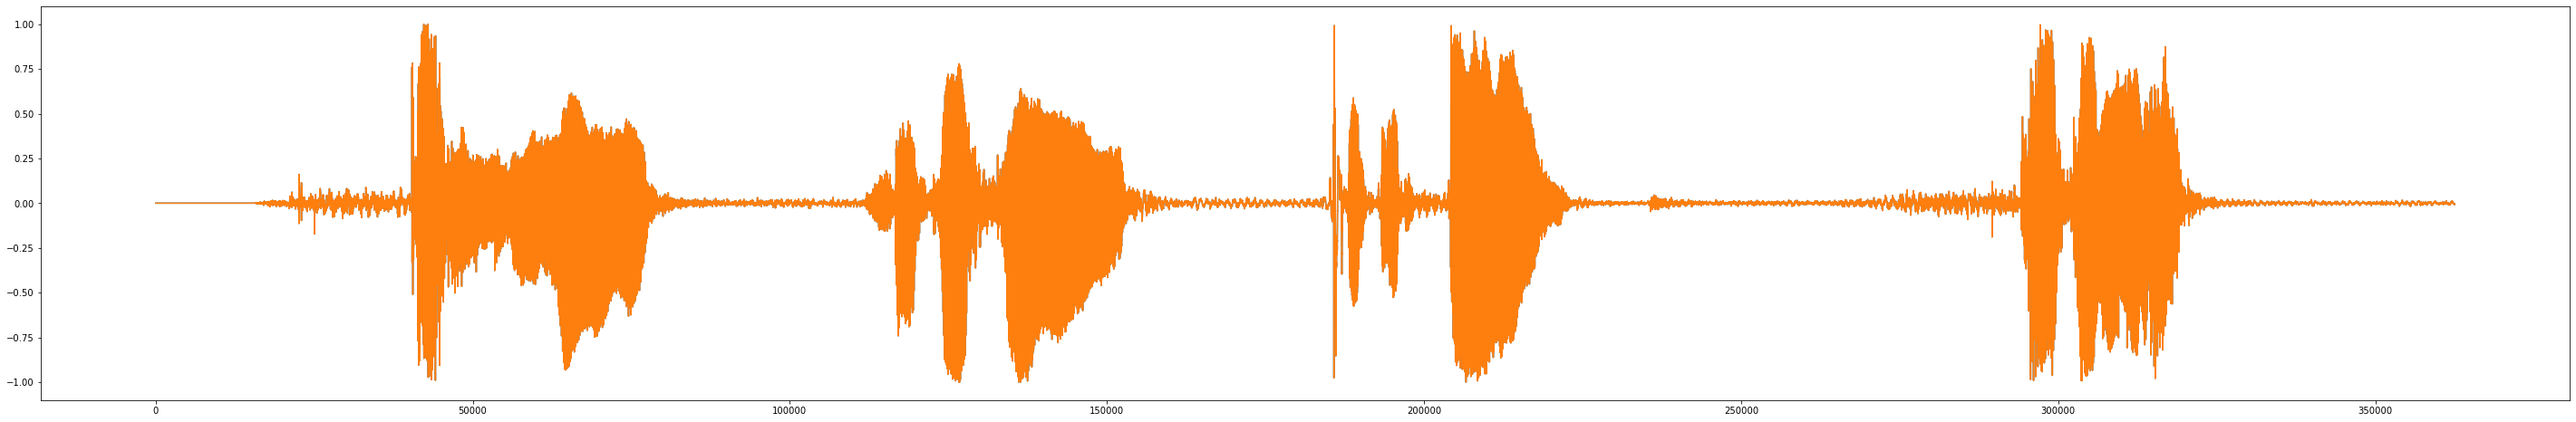

In [31]:
fig = plt.figure(figsize=(50, 8)) 
print(plt.plot(y))
print(plt.plot(y[0:len(y)]))
plt.savefig(file_id+'_shape.png')

In [38]:
start = []
end = []
first = True
con = 0

for time in range (len(y)):
    if(abs(y[time]) > 0.05):
        if(first):
            first = False
            start_time = time
        else:
            end_time = time
    else:
        con = con + 1
        if(con > 20000):
            con = 0
            if(not first) :
                start.append(start_time)
                end.append(end_time)
                first = True
print(len(start))
print(len(end))

6
6


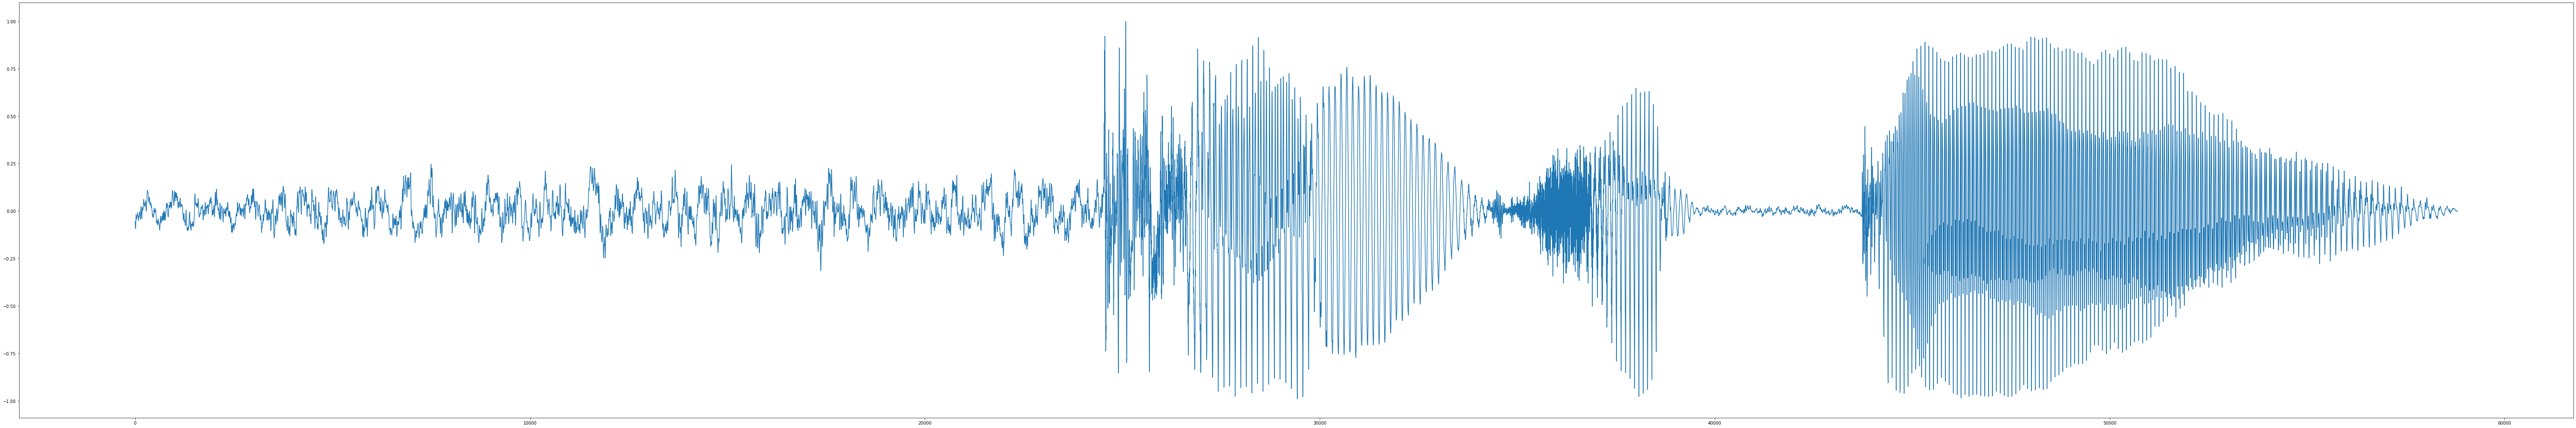

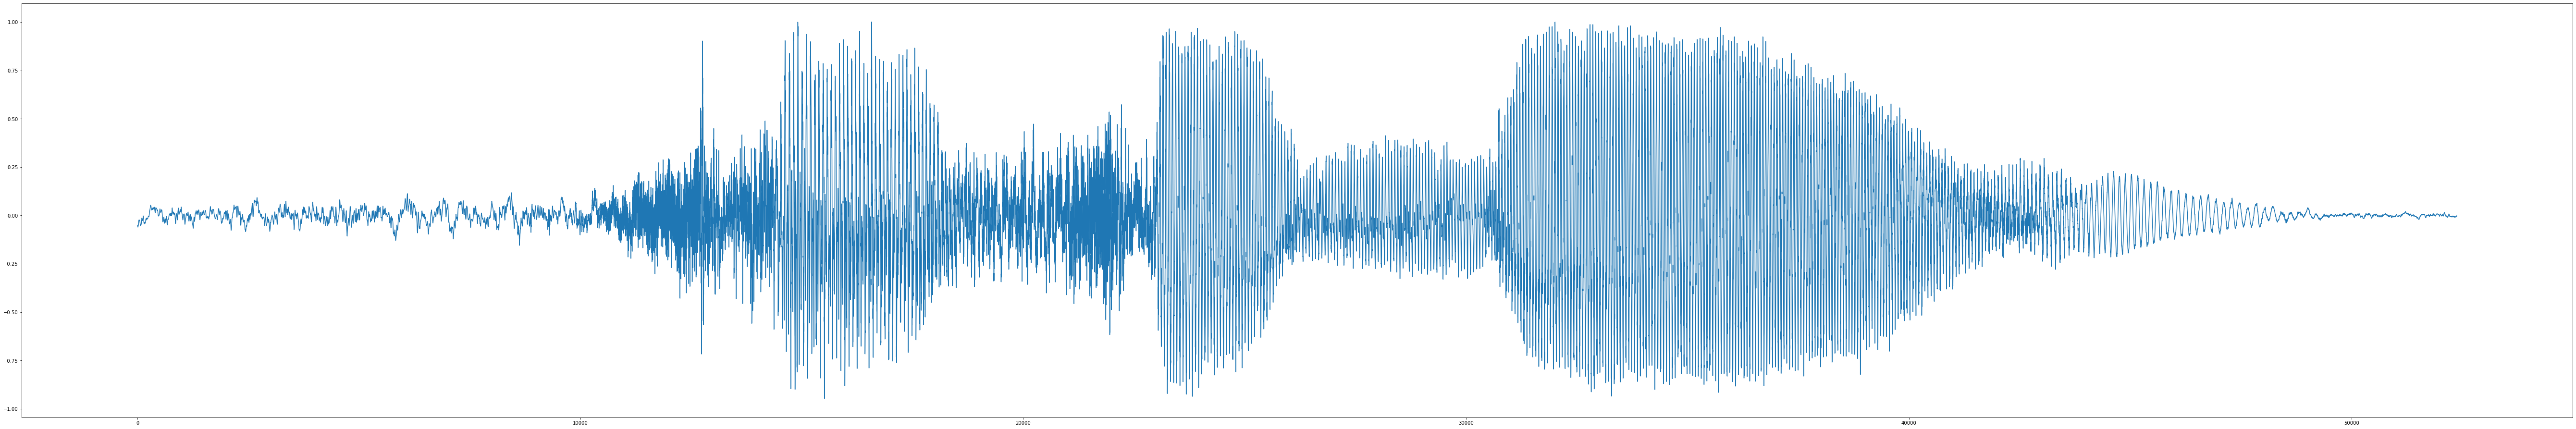

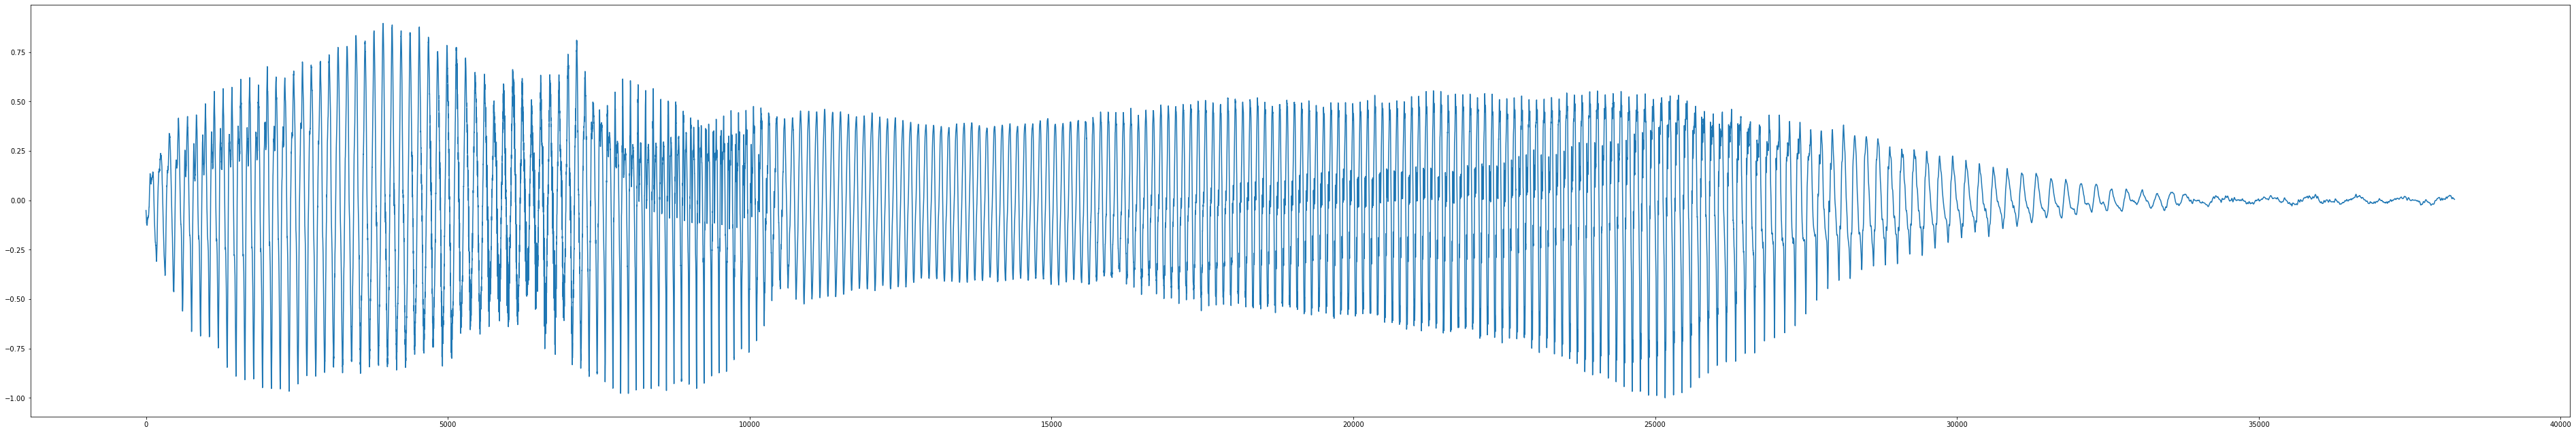

In [39]:
for i in range(len(start)):
    height = (end[i]-start[i])/3000
    width = (end[i]-start[i])/500
    if(height > 4) :
        fig = plt.figure(figsize=(width, height) )
        print(plt.plot(y[start[i]:end[i]+4800]))
        #plt.savefig("figure/fire_" + str(i+17) +'.png')
        
        sf.write("non_people" + str(i+1) + ".wav", y[start[i]:end[i]+9600], sr, subtype='PCM_24')

In [30]:
x=15
sf.write("fire_" + str(x+17) + "_32.wav", y[start[x]-4800:end[x]+9600], sr, subtype='PCM_32')

In [7]:

new_sr = 16000
y, origin_sr = librosa.load('non_tang.wav', sr=sr)
resample = librosa.resample(y, origin_sr, new_sr)
sf.write("non_tang16000.wav", resample, new_sr, subtype='PCM_16')

In [50]:
new_sr = 16000
directory = os.listdir('test2/non')
for file in directory :
    y, origin_sr = librosa.load('test2/non/' + file, sr=sr)
    resample = librosa.resample(y, origin_sr, new_sr)
    sf.write("test2/non/" +file, resample, new_sr, subtype='PCM_16')

In [6]:
wav = 'audiobook2.wav'

origin_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=origin_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')

C:\Users\JLK\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


sr:  44100
wav shape:  (82093295,)
length:  1861.5259637188208 secs


In [7]:
new_sr = 16000

for i in range(100):
    #print(np.random.randint(len(y)-40000))
    x = np.random.randint(len(y)-114400)+14400
    z = x + 88200
    newy = y[x:z]
    resample = librosa.resample(newy, sr, new_sr)
    sf.write("background/" + str(i) +".wav", resample, new_sr, subtype='PCM_16')

x = 571325
z = x + 40000

sf.write("background/3.wav", y[x:z], origin_sr, subtype='PCM_16')

new_sr = 16000
directory = os.listdir('newsbg_ko/')
for file in directory :
    y, origin_sr = librosa.load('newsbg_ko/' + file, sr=sr)
    resample = librosa.resample(y, origin_sr, new_sr)
    sf.write("newsbg_ko16000/" +file, resample, new_sr, subtype='PCM_16')

In [8]:
fire_directory = os.listdir('//audio16000/')
background_directory = os.listdir('//background/')

fires = []

for f_file in fire_directory:
    fires.append(f_file)

count = len(fires)    
k = 0

for b_file in background_directory :
    #print(b_file)
    background, background_sr = librosa.load('background/' + b_file, sr=16000)
    new_audio = []
    
    if(k >= count) :
        k = 0
        
    fire, fire_sr = librosa.load('audio16000/' + fires[k], sr=16000)
    fit_background = background[0:len(fire)]
    
    ratio = np.random.uniform(0.2,0.8)
    ratio = round(ratio, 2)
    for i in range(len(fire)):
        new_audio.append((ratio*fire[i])+((1-ratio)*background[i]))
        
    sf.write("final_audio2/" + str(ratio) + "_" +b_file[:-4] + "_" + fires[k], new_audio, 16000, subtype='PCM_16')
    
    k = k+1

In [6]:
from random import *

In [59]:
background_directory = os.listdir('test2/bg_extra/')

for b_file in background_directory :
    
    background, background_sr = librosa.load('test2/bg_extra/' + b_file, sr=16000)
    new_audio = []
    
    ratio = np.random.uniform(0,1.5)
    ratio = round(ratio, 2)
    
    for i in range(len(background)):
        new_audio.append(ratio*background[i])
        
    sf.write("test2/bg_extra_0to1/" + str(ratio) + "_" +b_file , new_audio, 16000, subtype='PCM_16')
    

In [16]:
for i in range(10):
    print(fires[i])

fire_12.wav
fire_13.wav
fire_14.wav
fire_15.wav
fire_16.wav
fire_17.wav
fire_19.wav
fire_20.wav
fire_21.wav
fire_22.wav


In [ ]:
fire_directory = os.listdir('test/fire/')
background_directory = os.listdir('test/newsroombg/')



for b_file in background_directory :
    print(b_file)
    background, background_sr = librosa.load('test/newsroombg/' + b_file, sr=16000)
    
    for f_file in fire_directory:
        ratio = rand (0.2 , 0.8)
        new_audio = []
        
        fire, fire_sr = librosa.load('test/fire/' + f_file, sr=16000)
        fit_background = background[0:len(fire)]
        
        for i in range(len(fire)):
            new_audio.append((ratio*fire[i])+((1-ratio)*background[i]))
        
        #print(max(new_audio))
        
        #fig = plt.figure(figsize=(50, 8)) 
        
        #print(plt.plot(new_audio))
        
        sf.write("test/final_audio/" +b_file + "_" + f_file, new_audio, 16000, subtype='PCM_16')

In [50]:
wav = 'sample.wav'

origin_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=origin_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')

sr:  16000
wav shape:  (9973,)
length:  0.6233125 secs


In [51]:
      
mfcc = librosa.feature.mfcc(y, sr=16000)

In [53]:
mfcc.shape

(20, 20)

In [28]:
wav = '0.08_0.07_en_404_f3.wav'
origin_sr = librosa.get_samplerate(wav)
y, sr = librosa.load(wav, sr=origin_sr)
print(len(y))
y_slow = librosa.effects.time_stretch(y, 1.5)
print(len(y_slow))
IPython.display.Audio(data=y_slow, rate=sr)

28323
18882
